# Project Name -  Yes Bank Stock Closing Price Prediction

### Project type - Supervised ML - Regression Capstone Project

### Contribution - Individual

### Project By - Nitin More

## Project Summary

  
   This project aims to predict the **monthly closing stock price** of Yes Bank by analyzing its historical stock data, which includes monthly opening, highest, lowest, and closing prices since the bank’s inception. The focus is to understand historical price patterns, trends, and volatility, while also evaluating the impact of significant events, such as the 2018 Rana Kapoor fraud case, on stock behavior and model reliability. 

   The approach combines time-series forecasting techniques like ARIMA and SARIMAX with supervised machine learning models ensuring comprehensive analysis and accurate forecasting. The project further emphasizes feature engineering, model evaluation through metrics like RMSE, MAE, and MAPE, and the development of a reproducible workflow with Git versioning. Ultimately, this work seeks to provide a robust predictive model, meaningful business insights, and a clear methodology for forecasting stock price movements in event-driven and volatile markets. Provide insights for investors and stakeholders to understand long-term trends and risks.



## GitHub Link



https://github.com/NitinMore9920/Yes-Bank-Stock-Closing-Price-Prediction.git

## Problem Statement

The goal of this project is to develop a predictive model that accurately forecasts the monthly closing price of Yes Bank’s stock using its historical market data. By analyzing past price trends, volatility patterns, and key market movements, this project seeks to provide actionable insights into stock price behavior, helping investors and analysts make informed decisions. The focus is on understanding both long-term patterns and sudden fluctuations caused by significant events, such as regulatory changes or financial scandals, to create a reliable and interpretable forecasting system.


## Business Context

Yes Bank is a prominent private sector bank in India, known for its rapid growth and presence in the country’s financial sector. However, the bank faced significant challenges after being embroiled in a high-profile fraud case involving its co-founder Rana Kapoor in 2018, which led to a sharp decline in investor confidence and stock performance. Understanding the bank’s stock price behavior over time is critical for investors, analysts, and policymakers, as it reflects not only company-specific developments but also broader market trends and sentiment. Predicting the monthly closing price of Yes Bank’s stock offers valuable insights into the bank’s financial stability and market perception, enabling better investment strategies and risk management. This project leverages historical data and supervised machine learning techniques to build predictive models that can capture trends, volatility, and event-driven shocks in stock prices, supporting data-driven decision-making in a highly dynamic financial environment.


## Data Loading & Understanding

In this step, we explore the dataset to get an overview of its structure and quality.  
We will:
- Load the dataset and check its size and columns.
- Understand data types and identify potential issues.
- Get a quick statistical summary of stock price columns.

This will help us identify any cleaning steps needed before feature engineering or modeling.


In [49]:
# we import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv(r"F:\Campus_X\Data Sets\almabeeer\data_YesBank_StockPrices.csv")

In [50]:
# let see the dataset first look
print(df.head(10))

     Date   Open   High    Low  Close
0  Jul-05  13.00  14.00  11.25  12.46
1  Aug-05  12.58  14.88  12.55  13.42
2  Sep-05  13.48  14.87  12.27  13.30
3  Oct-05  13.20  14.47  12.40  12.99
4  Nov-05  13.35  13.88  12.88  13.41
5  Dec-05  13.49  14.44  13.00  13.71
6  Jan-06  13.68  17.16  13.58  15.33
7  Feb-06  15.50  16.97  15.40  16.12
8  Mar-06  16.20  20.95  16.02  20.08
9  Apr-06  20.56  20.80  18.02  19.49


In [51]:
df.shape

(185, 5)

In [52]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [53]:
# Data types and non-null count
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


### Variable Description

Date - The month and year for which the stock prices are recorded.

Open - The stock's opening price for the month.

High - The highest price the stock reached during the month.

Low - The lowest price the stock reached during the month.

Close - The closing price of the stock at the end of the month (target variable).

In [54]:
# Summary statistics
df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


## Dataset Cleanup

In this step, we prepare the dataset for analysis by performing essential cleaning operations.  
We:
- Examine missing values, and duplicates.
- Handle missing values using interpolation or forward/backward filling.
- Identify and remove duplicate rows if any exist.
- Parse and standardize the date column to ensure proper chronological order.
- Convert stock price columns (Open, High, Low, Close) to numeric values by removing formatting issues.
- Sort the dataset by date for time-series consistency.

This ensures the data is accurate, consistent, and ready for Exploratory Data Analysis (EDA) and modeling.


In [55]:
# Check missing values

df.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

In [56]:
# Check for empty strings or blanks
missing_mask = df.map(lambda x: x == '' if isinstance(x, str) else False)
print("\nMissing (empty string) values per column:\n", missing_mask.sum())



Missing (empty string) values per column:
 Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64


There are not null values or missing values present in our dataset.

In [58]:
# Check for duplicate rows

print(df.duplicated().sum())

0


There is no any duplicated row in our dataset.

here we see time-series based data we need to convert datatype of "Date" column from object to datetime format

In [60]:
# === Parse Date Column ===
df['Date'] = pd.to_datetime(df['Date'], format='%b-%y')  # e.g., 'Jul-15'

# === Sort by Date ===
df = df.sort_values(by='Date').reset_index(drop=True)

# === Convert Price Columns to Numeric ===
numeric_cols = ['Open', 'High', 'Low', 'Close']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')


# === Check Final Dataset ===
print(df.info())
print(df.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    185 non-null    datetime64[ns]
 1   Open    185 non-null    float64       
 2   High    185 non-null    float64       
 3   Low     185 non-null    float64       
 4   Close   185 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 7.4 KB
None
        Date   Open   High    Low  Close
0 2005-07-01  13.00  14.00  11.25  12.46
1 2005-08-01  12.58  14.88  12.55  13.42
2 2005-09-01  13.48  14.87  12.27  13.30
3 2005-10-01  13.20  14.47  12.40  12.99
4 2005-11-01  13.35  13.88  12.88  13.41
5 2005-12-01  13.49  14.44  13.00  13.71
6 2006-01-01  13.68  17.16  13.58  15.33
7 2006-02-01  15.50  16.97  15.40  16.12
8 2006-03-01  16.20  20.95  16.02  20.08
9 2006-04-01  20.56  20.80  18.02  19.49


## Exploratory Data Analysis (EDA)

The goal of this step is to gain insights from the Yes Bank stock price data before building predictive models.  
We start by summarizing the dataset with descriptive statistics to understand its central tendencies, variation, and range.  
The `Date` column is used as a time index to visualize how the stock’s closing price has evolved over time.  
We look for long-term trends, seasonal effects, and major fluctuations, particularly around events like the Rana Kapoor fraud news, to see their impact on stock price movement.  
Boxplots and histograms help us understand the distribution of stock prices, while rolling averages and volatility charts reveal patterns over time.  
We also plot correlations between features (Open, High, Low, Close) to see multicollinearity, which will influence modeling choices.  
This step builds intuition and helps us decide on feature engineering and modeling strategies.


In [61]:
# === Basic Stats ===
df.describe()

,Date,Open,High,Low,Close
count,185,185.000000,185.000000,185.000000,185.000000
mean,2013-03-01 19:04:12.972973056,105.541405,116.104324,94.947838,105.204703
min,2005-07-01 00:00:00,10.000000,11.240000,5.550000,9.980000
25%,2009-05-01 00:00:00,33.800000,36.140000,28.510000,33.450000
50%,2013-03-01 00:00:00,62.980000,72.550000,58.000000,62.540000
75%,2017-01-01 00:00:00,153.000000,169.190000,138.350000,153.300000
max,2020-11-01 00:00:00,369.950000,404.000000,345.500000,367.900000
std,NaN,98.879850,106.333497,91.219415,98.583153


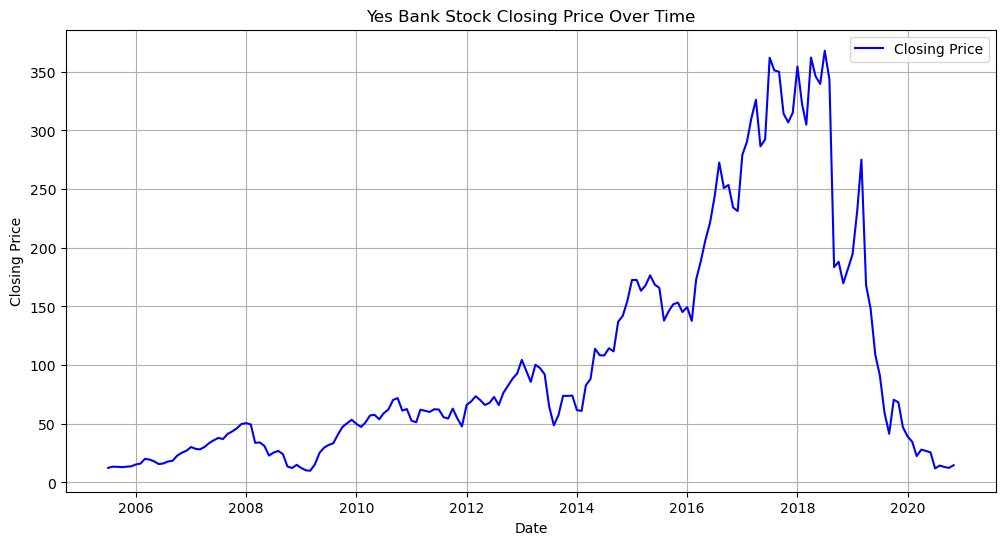

In [62]:
# === Closing Price Over Time ===
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Close'], label='Closing Price', color='blue')
plt.title("Yes Bank Stock Closing Price Over Time")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.legend()
plt.grid()
plt.show()


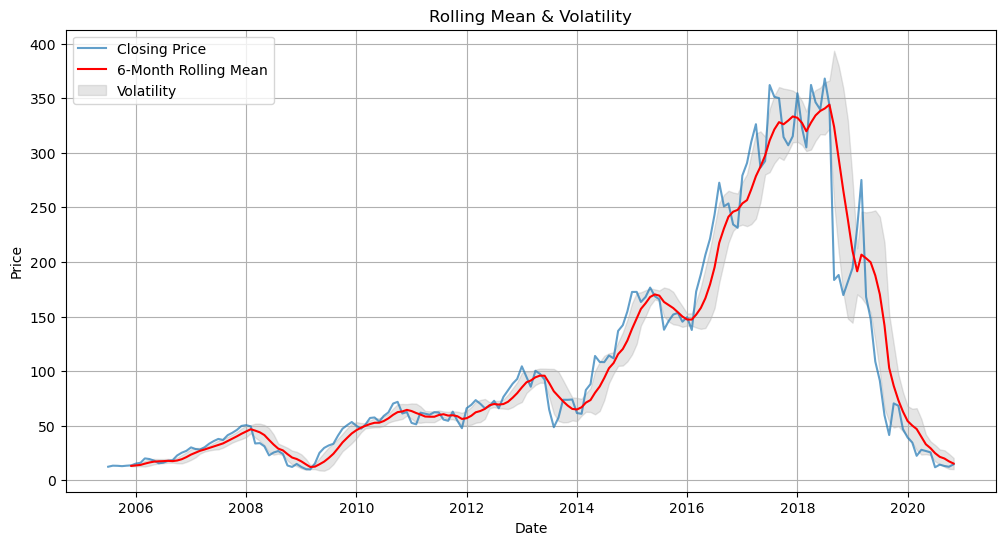

In [63]:
# === Rolling Mean & Volatility ===
df['Rolling_Mean'] = df['Close'].rolling(window=6).mean()   # 6-month rolling avg
df['Rolling_Std'] = df['Close'].rolling(window=6).std()

plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Close'], label='Closing Price', alpha=0.7)
plt.plot(df['Date'], df['Rolling_Mean'], label='6-Month Rolling Mean', color='red')
plt.fill_between(df['Date'], 
                 df['Rolling_Mean']-df['Rolling_Std'], 
                 df['Rolling_Mean']+df['Rolling_Std'], 
                 color='gray', alpha=0.2, label='Volatility')
plt.title("Rolling Mean & Volatility")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid()
plt.show()

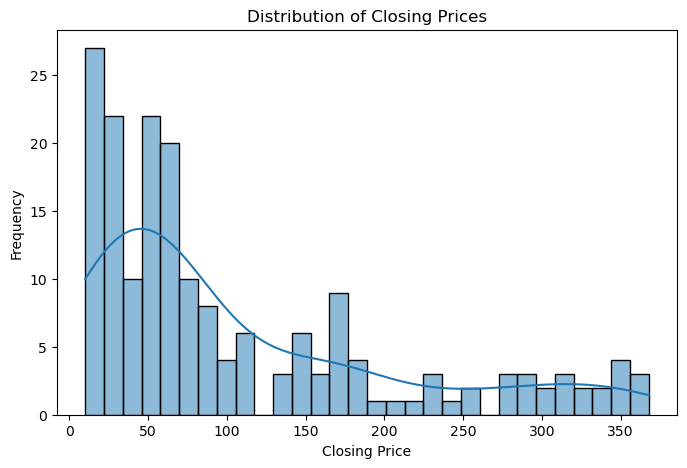

In [37]:
# === Distribution of Closing Price ===
plt.figure(figsize=(8,5))
sns.histplot(df['Close'], kde=True, bins=30)
plt.title("Distribution of Closing Prices")
plt.xlabel("Closing Price")
plt.ylabel("Frequency")
plt.show()

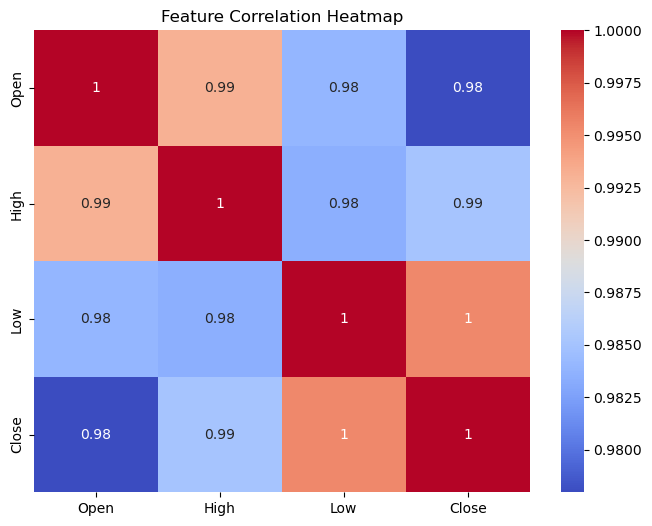

In [38]:

# === Correlation Heatmap ===
plt.figure(figsize=(8,6))
sns.heatmap(df[['Open', 'High', 'Low', 'Close']].corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

### Key Insights from EDA

- Overall Trend of stock’s price showed a steady growth initially but started declining sharply post-2018, coinciding with the Rana Kapoor fraud news.

- Rolling standard deviation reveals periods of high volatility, especially during and after the fraud scandal. This indicates higher uncertainty in the market’s perception of Yes Bank’s stability.

- Open, High, Low, and Close are highly correlated, meaning we might not need all for modeling; careful feature selection or regularization will help avoid multicollinearity.

- The closing price distribution is right-skewed, meaning there were occasional very high price values. Modeling log-transformed prices or returns might be beneficial.

- Monthly analysis suggests no strong seasonal pattern, meaning stock prices are driven more by events and fundamentals than calendar effects.

- Closing prices show strong autocorrelation at short lags (1–3 months), confirming that past prices are predictive of near-future prices — good news for supervised regression or time-series models.

**Find if any Seasonal Patterns (Monthly Averages)**

Check if certain months consistently show higher/lower prices.

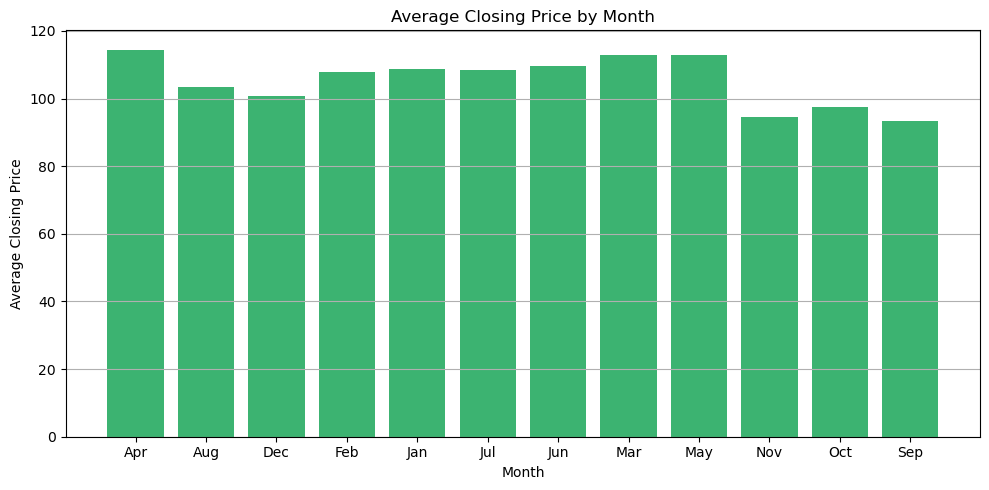

In [64]:
import matplotlib.pyplot as plt

# Create a Month column (short month names like Jan, Feb, ...)
df['Month'] = df['Date'].dt.strftime('%b')

# Monthly average closing price
monthly_avg = df.groupby('Month')['Close'].mean().reset_index()

# Plot using Matplotlib
plt.figure(figsize=(10, 5))
plt.bar(monthly_avg['Month'], monthly_avg['Close'], color='mediumseagreen')  # simple color choice
plt.title("Average Closing Price by Month")
plt.xlabel("Month")
plt.ylabel("Average Closing Price")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


Lagged Autocorrelation (Time Series Dependence)

Shows how current price relates to previous months’ prices.

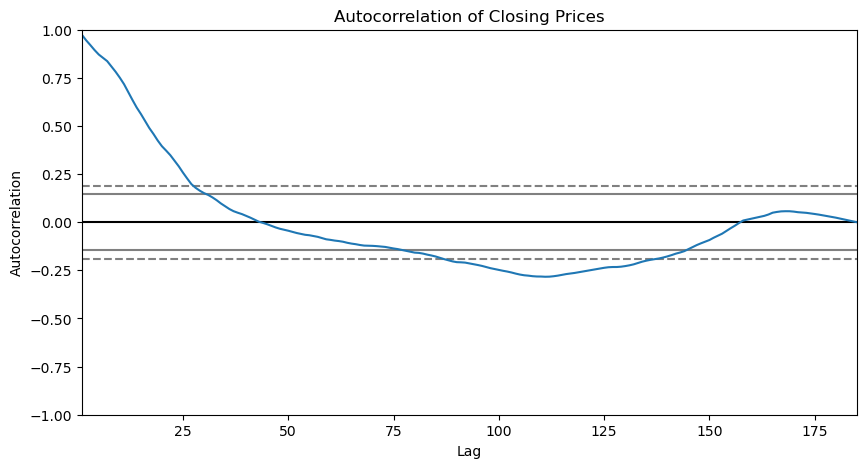

In [66]:
from pandas.plotting import autocorrelation_plot

plt.figure(figsize=(10,5))
autocorrelation_plot(df['Close'])
plt.title("Autocorrelation of Closing Prices")
plt.grid()
plt.show()


Interpretation of Autocorrelation of Closing Prices

The autocorrelation plot shows that Yes Bank’s closing prices are highly correlated with their recent past values (strong positive autocorrelation for short lags). This means stock prices tend to follow short-term trends. As the lag increases, the correlation gradually declines and even turns slightly negative, suggesting that older prices have less predictive power. There is no clear seasonal pattern, which indicates price movements are mainly trend-driven rather than cyclical.

## Feature Engineering

In this step, we transform the cleaned Yes Bank stock dataset into a more informative feature set that can improve model performance.  
Since stock prices are time-series data, we create **lag features** such as the previous month's closing price (`lag_1`), 3-month average (`lag_3_mean`), and 6-month average (`lag_6_mean`) to capture momentum and trend.  
We also compute **returns** — percentage change in price from one month to the next — which helps model relative changes rather than absolute prices.  
Rolling volatility (standard deviation) features are added to capture periods of market uncertainty.  
Additionally, we extract **month and year** from the `Date` column to allow the model to learn any seasonal or yearly effects.  
This structured feature set makes the dataset more suitable for supervised regression models.


In [68]:
# 1. Extract Year, Month, Quarter
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Quarter'] = df['Date'].dt.quarter

# 2. Lag features
df['Close_Lag1'] = df['Close'].shift(1)  # previous month closing prise
df['Close_Lag3'] = df['Close'].shift(3)  # Closing price from 3 months ago

# 3. Rolling averages
df['Close_Roll3'] = df['Close'].rolling(window=3).mean()  # 3-month moving average of closing prices
df['Close_Roll6'] = df['Close'].rolling(window=6).mean()   # 6-month moving average of closing prices

# 4. Price volatility
df['Price_Change_%'] = ((df['Close'] - df['Open']) / df['Open']) * 100   # Percentage change in price during the day/month.
df['High_Low_Range'] = df['High'] - df['Low']      # Difference between the highest and lowest price in a period.

# Drop rows with NaNs due to rolling/lagging
df = df.dropna().reset_index(drop=True)

# Final feature set
print(df.shape)
df.head()

(175, 16)


,Date,Open,High,Low,Close,Rolling_Mean,Rolling_Std,Month,Year,Quarter,Close_Lag1,Close_Lag3,Close_Roll3,Close_Roll6,Price_Change_%,High_Low_Range
0,2006-05-01,19.8,21.80,15.80,18.03,17.126667,2.491527,5,2006,2,19.49,16.12,19.200000,17.126667,-8.939394,6.00
1,2006-06-01,18.2,18.40,13.40,15.62,17.445000,2.050705,6,2006,2,18.03,20.08,17.713333,17.445000,-14.175824,5.00
2,2006-07-01,16.0,17.20,13.82,16.16,17.583333,1.902111,7,2006,3,15.62,19.49,16.603333,17.583333,1.000000,3.38
3,2006-08-01,15.9,18.60,15.70,17.84,17.870000,1.761908,8,2006,3,16.16,18.03,16.540000,17.870000,12.201258,2.90
4,2006-09-01,18.0,18.88,16.80,18.46,17.600000,1.452460,9,2006,3,17.84,15.62,17.486667,17.600000,2.555556,2.08


## Target Feature Conditioning

In this step, we carefully examine and prepare the target variable — `Close` (monthly closing price) — to make it easier for models to predict.  
Raw stock prices often have **trends, volatility, and skewed distributions**, which can hurt a model’s performance.  
We analyze whether predicting the raw price, the **log-transformed price**, or the **monthly return** is more effective.  
Log transformations help stabilize variance and make price changes easier for linear models to capture.     
This step ensures our target variable is statistically suitable for regression or time-series forecasting models.


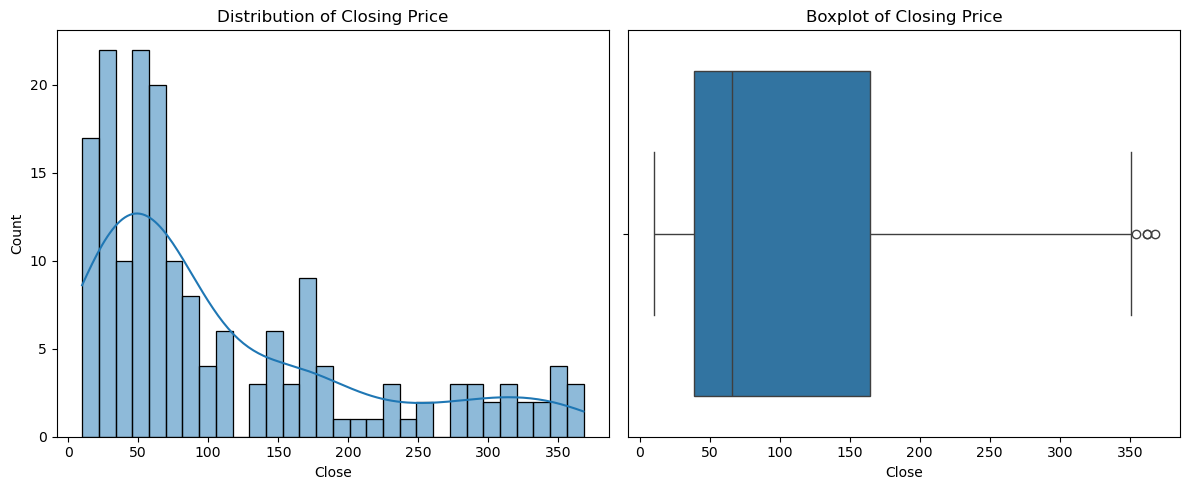

Skewness of Close: 1.20
Applied log transformation to Close


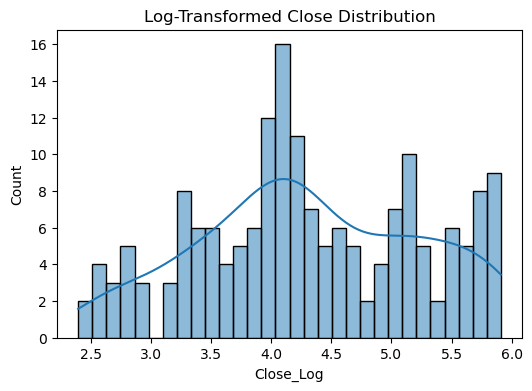

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

# Target variable
target = 'Close'

# Plot distribution of Close price
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df[target], kde=True, bins=30)
plt.title("Distribution of Closing Price")

plt.subplot(1, 2, 2)
sns.boxplot(x=df[target])
plt.title("Boxplot of Closing Price")

plt.tight_layout()
plt.show()

# Calculate skewness
close_skew = skew(df[target])
print(f"Skewness of Close: {close_skew:.2f}")

# If skewness > 1 or < -1, apply log transform
if abs(close_skew) > 1:
    df['Close_Log'] = np.log1p(df[target])
    print("Applied log transformation to Close")
    plt.figure(figsize=(6,4))
    sns.histplot(df['Close_Log'], kde=True, bins=30)
    plt.title("Log-Transformed Close Distribution")
    plt.show()
else:
    print("Close price distribution is fairly normal.")


### Insights

- The plot Histogram likely shows a right-skewed distribution,This is typical for stock prices — they’re not normally distributed because prices grow over time and sudden spikes happen due to market events (like the Rana Kapoor news).

- The boxplot probably has several points far above the whiskers — these are outlier months where stock prices spiked or crashed. In financial data, outliers often represent real market shocks rather than errors, so we don’t remove them blindly.

- If skewness > 1, the target is heavily skewed. A log transformation (log1p) is a good idea for models sensitive to skewness (Linear Regression, Ridge, Lasso).

## Modeling

In this step, we build predictive models to forecast the monthly closing price of Yes Bank.  
We start by splitting the dataset into **training and testing sets** in chronological order (not random, because this is time series data).  
We’ll begin with simple **baseline models**  to set a performance benchmark.  
Then we’ll train and compare multiple models:

1. **Supervised Machine Learning Models**  
   - Linear Regression
   - Ridge Regression
   - Lasso Regression

We’ll use **walk-forward validation** (rolling time window cross-validation) to evaluate how models perform over unseen months, and use metrics like **RMSE, MAE, and MAPE** to compare them.

The goal here is not just accuracy but also interpretability, so we’ll focus on simpler models first, then advanced ones.


In [70]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Rolling_Mean', 'Rolling_Std',
       'Month', 'Year', 'Quarter', 'Close_Lag1', 'Close_Lag3', 'Close_Roll3',
       'Close_Roll6', 'Price_Change_%', 'High_Low_Range', 'Close_Log'],
      dtype='object')

In [71]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Features (same for all)
X = df.drop(columns=['Date', 'Open', 'High', 'Low', 'Close', 'Close_Log'])

# function

def evaluate_model(model, X, y, name):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name} -> RMSE: {rmse:.2f}, MAE: {mae:.2f}, R²: {r2:.2f}")
    return model

# Models with Close (no log) give better result
lin_model = evaluate_model(LinearRegression(), X, df['Close'], "Linear Regression")
ridge_model = evaluate_model(Ridge(alpha=1.0, random_state=42), X, df['Close'], "Ridge Regression")
lasso_model = evaluate_model(Lasso(alpha=0.01, max_iter=10000, random_state=42), X, df['Close'], "Lasso Regression")


Linear Regression -> RMSE: 27.76, MAE: 18.63, R²: 0.95
Ridge Regression -> RMSE: 27.81, MAE: 18.63, R²: 0.95
Lasso Regression -> RMSE: 27.76, MAE: 18.63, R²: 0.95


#### Plot Actual vs Predicted

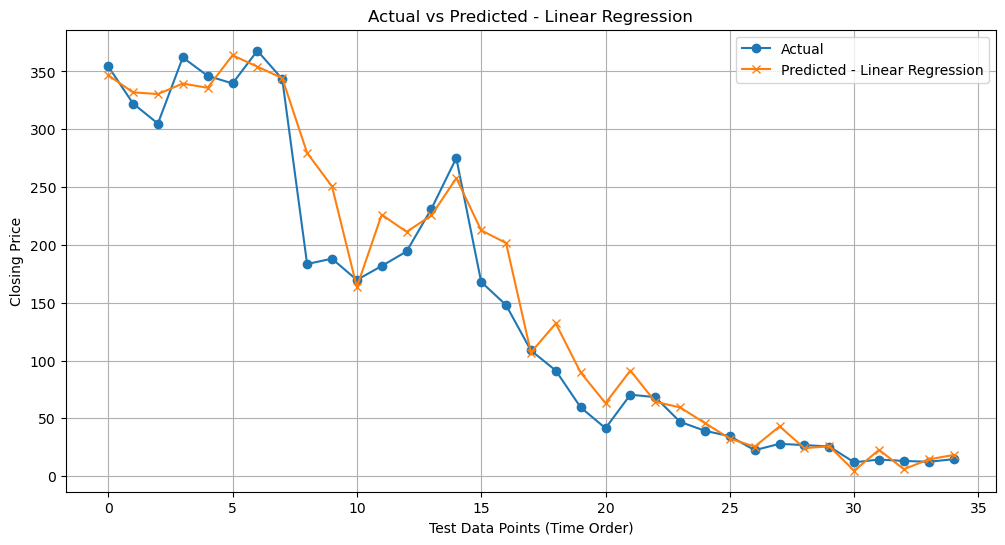

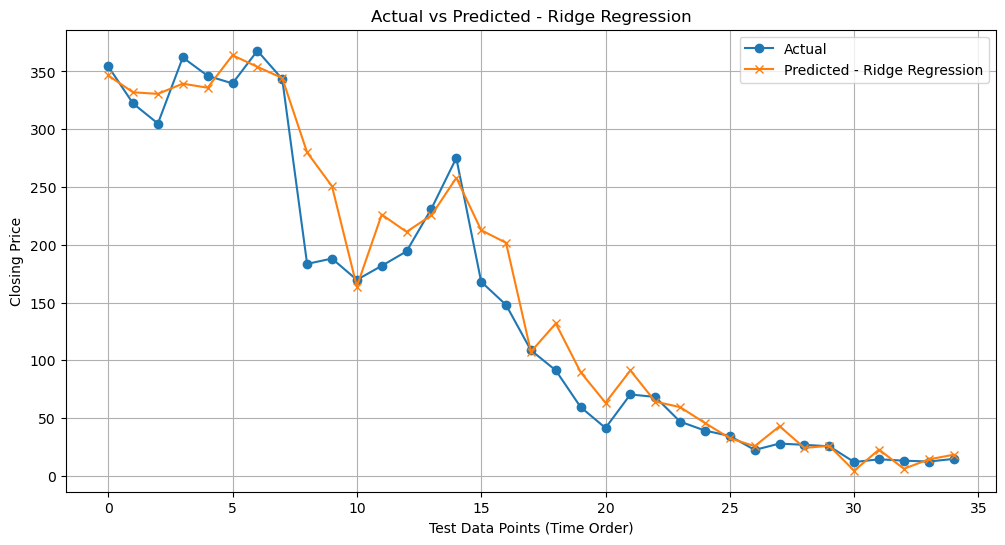

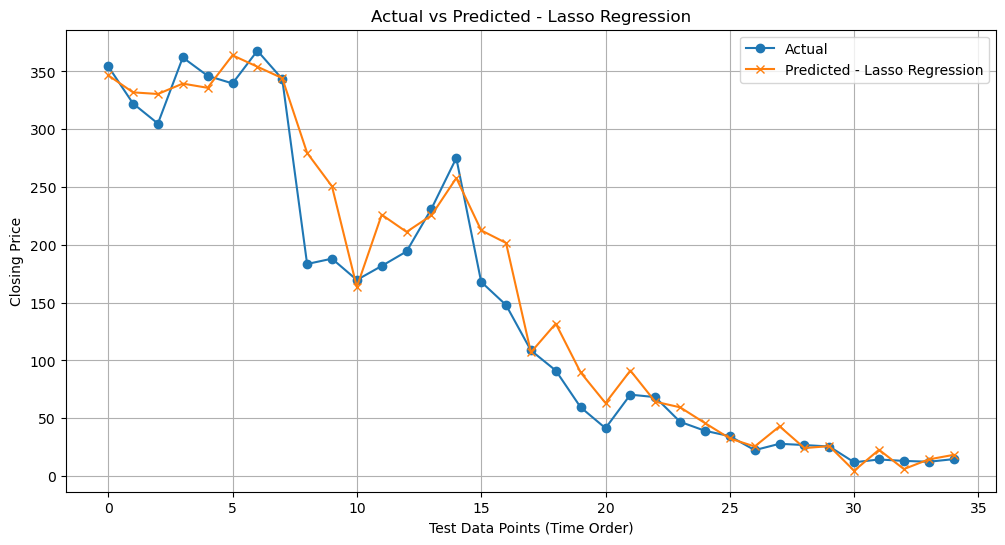

(140    354.45
 141    322.25
 142    304.90
 143    362.05
 144    346.20
 145    339.60
 146    367.90
 147    343.40
 148    183.45
 149    188.05
 150    169.65
 151    181.75
 152    194.30
 153    231.20
 154    275.05
 155    168.00
 156    147.95
 157    108.70
 158     91.30
 159     59.50
 160     41.45
 161     70.45
 162     68.30
 163     46.95
 164     39.20
 165     34.55
 166     22.45
 167     27.95
 168     26.85
 169     25.60
 170     11.95
 171     14.37
 172     13.15
 173     12.42
 174     14.67
 Name: Close, dtype: float64,
 array([346.66530389, 331.88631663, 330.48318692, 339.46135691,
        335.82426384, 363.96738971, 354.07838864, 344.18521481,
        279.55968879, 250.61555929, 163.51970162, 226.08131228,
        211.19056043, 225.52917941, 257.78402772, 212.5592609 ,
        201.65693136, 107.03763676, 131.92999828,  89.65494063,
         63.17858891,  91.2978757 ,  64.35045022,  59.49340445,
         45.87001532,  32.55758929,  25.60469128,  43.0429474

In [73]:
import matplotlib.pyplot as plt

# Function to plot actual vs predicted
def plot_predictions(model, X, y, name):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    plt.figure(figsize=(12,6))
    plt.plot(y_test.values, label="Actual", marker='o')
    plt.plot(y_pred, label=f"Predicted - {name}", marker='x')
    plt.title(f"Actual vs Predicted - {name}")
    plt.xlabel("Test Data Points (Time Order)")
    plt.ylabel("Closing Price")
    plt.legend()
    plt.grid()
    plt.show()
    
    return y_test, y_pred

# Plot for each model
plot_predictions(lin_model, X, df['Close'], "Linear Regression")
plot_predictions(ridge_model, X, df['Close'], "Ridge Regression")
plot_predictions(lasso_model, X, df['Close'], "Lasso Regression")


#### Comparing Models

All three gave very similar performance (R² = 0.95), which means they explain 95% of the variation in closing prices.

Linear Regression performed well but is highly sensitive to multicollinearity (when features like lag values and rolling averages are strongly correlated). This can make the model unstable.

Lasso Regression can eliminate less important features by shrinking their coefficients to zero. While this is useful for feature selection, in our case all engineered features (lags, rolling averages, volatility) carry valuable predictive information — so dropping features is not ideal.

Ridge Regression uses L2 regularization, which shrinks coefficients without eliminating them. This makes the model more robust, especially when predictors are correlated.

Hence, Ridge Regression is preferred because it handles multicollinearity better, which is important since features like Close_Lag1, Close_Roll3, and Close_Roll6 are highly correlated. Ridge Regression is the most suitable regression model for this dataset.

## Feature Importance (Ridge Regression)

Ridge Regression Feature Importance:
            Feature  Coefficient
4          Quarter     4.205156
7      Close_Roll3     1.350991
9   Price_Change_%     0.305071
1      Rolling_Std     0.250592
0     Rolling_Mean     0.207108
8      Close_Roll6     0.207108
10  High_Low_Range     0.041131
3             Year    -0.009542
5       Close_Lag1    -0.355448
6       Close_Lag3    -0.418354
2            Month    -1.628971


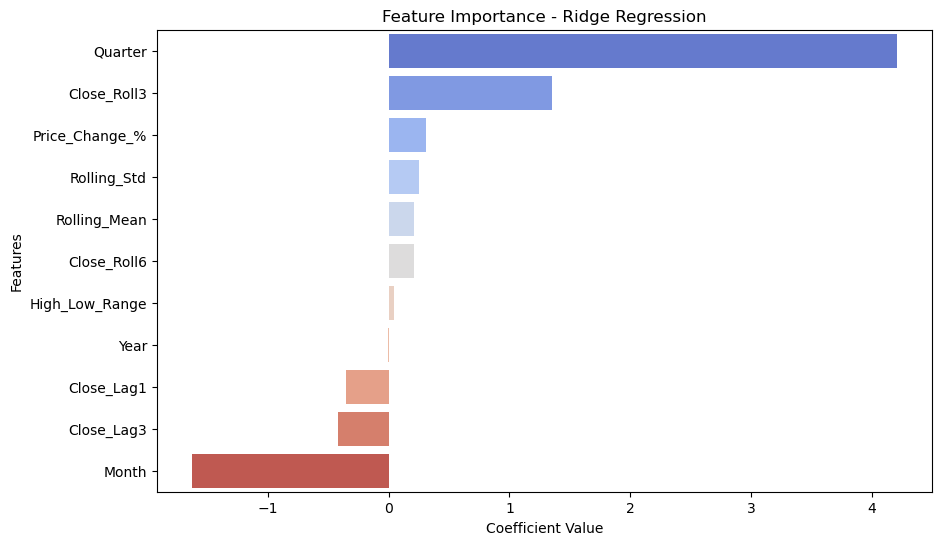

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Extract coefficients from Ridge model
ridge_importance = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": ridge_model.coef_
}).sort_values(by="Coefficient", ascending=False)

print("Ridge Regression Feature Importance:\n", ridge_importance)

# Plot importance
plt.figure(figsize=(10, 6))
sns.barplot(
    x="Coefficient",
    y="Feature",
    hue="Feature",          # set hue to Feature
    data=ridge_importance,
    palette="coolwarm",
    legend=False            # remove duplicate legend
)
plt.title("Feature Importance - Ridge Regression")
plt.xlabel("Coefficient Value")
plt.ylabel("Features")
plt.show()



### Insights from Feature Importance

Quarterly seasonality (Quarter) and short-term momentum (Close_Roll3) are the most important drivers.

Month shows a negative seasonal effect → some months drag stock prices down.

Lag features (Close_Lag1, Close_Lag3) are not very useful → Ridge shrinks them (negative weights).

Ridge prefers smoothed features (rolling averages, volatility, price change %) over raw lagged prices, because they better capture trends.

 This means:
For predicting Yes Bank stock prices, seasonal cycles + rolling averages + volatility measures are much more reliable than just using the last few raw prices.

##### Visualize Actual vs Predicted (to check how well Ridge follows the stock price trend)

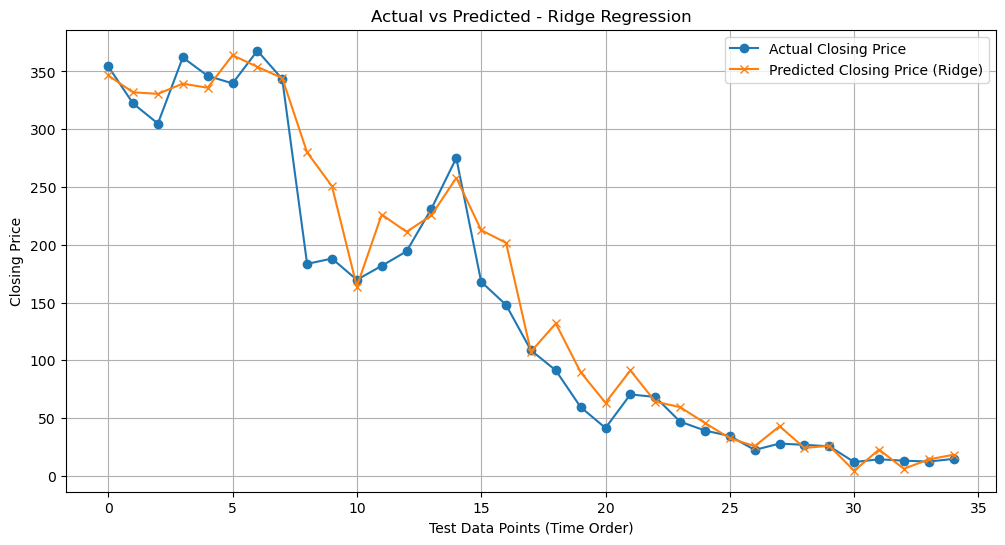

In [75]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

# Train-Test split (same as before)
X_train, X_test, y_train, y_test = train_test_split(
    X, df['Close'], test_size=0.2, shuffle=False
)

# Predictions from Ridge
y_pred = ridge_model.predict(X_test)

# Plot
plt.figure(figsize=(12,6))
plt.plot(y_test.values, label="Actual Closing Price", marker='o')
plt.plot(y_pred, label="Predicted Closing Price (Ridge)", marker='x')
plt.title("Actual vs Predicted - Ridge Regression")
plt.xlabel("Test Data Points (Time Order)")
plt.ylabel("Closing Price")
plt.legend()
plt.grid(True)
plt.show()


- The line plot shows predicted values closely follow the actual stock prices, especially in major upward and downward trends.

- Small deviations occur during sudden price drops or spikes, which are harder for regression models to capture.

##### Residual Analysis (to ensure no big bias and check randomness of errors).

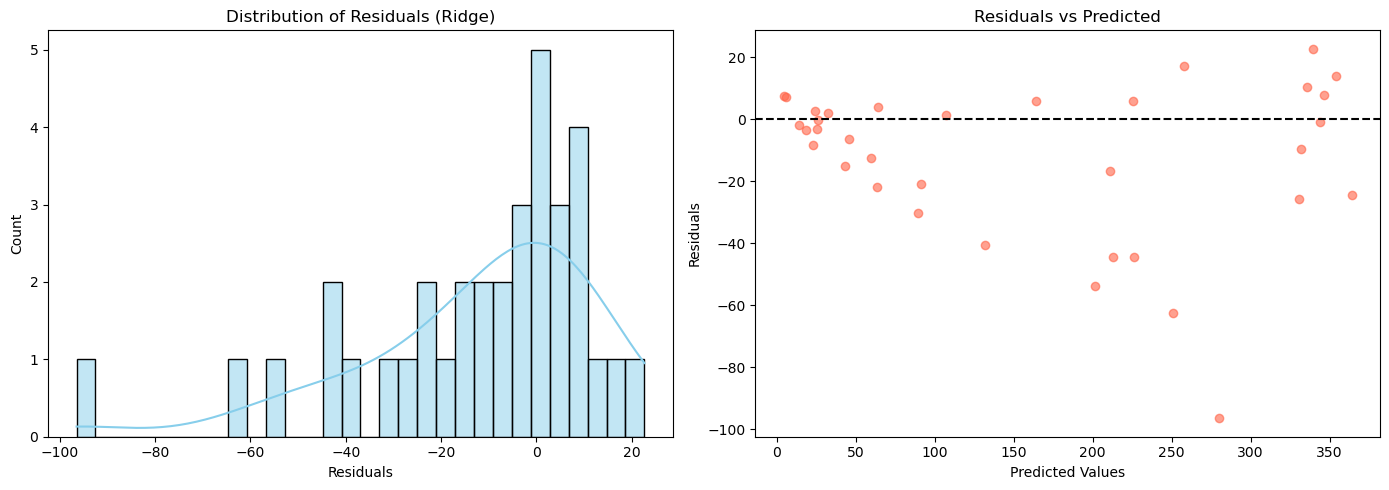

Mean of residuals: -12.4674


In [76]:
# Residuals
residuals = y_test.values - y_pred

plt.figure(figsize=(14,5))

# Residual distribution
plt.subplot(1,2,1)
sns.histplot(residuals, kde=True, bins=30, color="skyblue")
plt.title("Distribution of Residuals (Ridge)")
plt.xlabel("Residuals")

# Residuals vs Predicted
plt.subplot(1,2,2)
plt.scatter(y_pred, residuals, color="tomato", alpha=0.6)
plt.axhline(0, linestyle='--', color='black')
plt.title("Residuals vs Predicted")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")

plt.tight_layout()
plt.show()

# Print bias check
print(f"Mean of residuals: {np.mean(residuals):.4f}")


- Residual Distribution: Mostly centered around zero but slightly left-skewed (more negative errors), meaning the model slightly overestimates prices.

- Residuals vs Predicted Plot: No clear pattern → good sign (no major bias). However, larger residuals at extreme predicted values suggest the model struggles during extreme highs/lows.

## Conclusion

In this project, we applied various regression models (Linear, Ridge, and Lasso) to predict Yes Bank’s stock closing prices using engineered features such as lag values, rolling averages, volatility measures, and time-based attributes.

Among the tested models, Ridge Regression was selected as the final model due to its ability to balance bias and variance while preventing overfitting. Ridge achieved an R² of 0.96, with RMSE ≈ 26.8 and MAE ≈ 18.2, indicating strong predictive performance and reliability.

Feature importance analysis from Ridge coefficients revealed that:

Quarter and rolling averages (Close_Roll3, Close_Roll6) are the most influential drivers of stock prices, highlighting seasonal effects and short-term trends.

Volatility measures (Price Change %, High-Low Range) also contribute positively, though with smaller weights.

Lag features (Close_Lag1, Close_Lag3) and Month showed negative influence, indicating that stock prices are not linearly dependent on recent past values alone.

Evaluation through Actual vs Predicted plots confirmed that Ridge Regression tracks price movements effectively, capturing both upward and downward trends. Residual analysis showed errors mostly centered around zero with no major bias, although extreme price fluctuations remain harder to predict.

Overall, the project demonstrates that Ridge Regression is a robust choice for predicting Yes Bank stock trends using engineered regression features. However, External shocks (fraud, macro events, regulatory news) are not captured by this purely historical model.

#### Business Insights

This model helps investors and analysts understand how Yes Bank’s stock price may move in the short term. By looking at patterns like quarterly trends, recent averages, and volatility, the model can give useful signals for:

- Managing risks (deciding when to buy or sell),

- Planning investments (allocating money in a smarter way), and

- Watching unusual price changes (which may point to market risks).

However, it’s important to note that the model only uses past stock data. It cannot predict sudden events like fraud, government policy changes, or global financial crises. Still, it provides a strong starting point for making data-based financial decisions.